# **df3 - Model Training**

# **Fraudulent Claims Dataset**

In [ ]:
########################################################################

# **This dataset is specifically used to detect fraudulent claims using anomaly detection and classification models.**

In [ ]:
import pandas as pd

In [ ]:
df3=pd.read_csv('/content/df3_preprocessed.csv')

In [ ]:
df3.head()

Unnamed: 0                              Claim_ID  Claim_Date  \
0           0  bdd640fb-0667-4ad1-9c80-317fa3b1799d  2021-07-19   
1           1  8b9d2434-e465-4150-bd9c-66b3ad3c2d6d  2020-08-09   
2           2  9a1de644-815e-46d1-bb8f-aa1837f8a88b  2020-04-21   
3           3  72ff5d2a-386e-4be0-ab65-a6a48b8148f6  2023-02-13   
4           4  6c307511-b2b9-437a-a8df-6ec4ce4a2bbd  2021-11-15   

                        Policyholder_ID  Claim_Amount  Suspicious_Flags  \
0  1a3d1fa7-bc89-40a9-a3b8-c1e9392456de      32151.63                 0   
1  17fc695a-07a0-4a6e-8822-e8f36c031199       7407.13                 0   
2  b38a088c-a65e-4389-b74d-0fb132e70629       4803.47                 1   
3  c241330b-01a9-471f-9e8a-774bcf36d58b      12016.71                 1   
4  c37459ee-f50b-4a63-b71e-cd7b27cd8130      32669.28                 0   

   Fraud_Label  Claim_Type_Home Damage  Claim_Type_Medical  \
0            0                       0                   1   
1            0                       0                   1   
2            0                       0                   0   
3            0                       1                   0   
4            0                       1                   0   

   Claim_Type_Vehicle  ...  Claim_Day  Annual_Income  Claim_to_Income_Ratio  \
0                   0  ...         19         126531               0.254101   
1                   0  ...          9         184130               0.040228   
2                   1  ...         21          82529               0.058203   
3                   0  ...         13         185307               0.064848   
4                   0  ...         15          74026               0.441322   

   Policy_Issuance_Date  Days_Since_Issuance Short_Period_Claim  \
0            2020-11-21                  240               True   
1            2019-08-03                  372              False   
2            2017-08-23                  972              False   
3            2022-03-02                  348               True   
4            2020-12-10                  340               True   

   Elliptic_Anomaly  Isolation_Anomaly LOF_Anomaly Fraud_Probability_Score  
0            Normal             Normal      Normal                     0.0  
1            Normal             Normal      Normal                     0.0  
2            Normal            Anomaly     Anomaly                     0.0  
3            Normal             Normal      Normal                     0.0  
4           Anomaly             Normal      Normal                     0.0  

[5 rows x 22 columns]

# **Extract Dates From Policy Issues Date**

In [ ]:
# Extract date parts from Claim_Date
df3['Policy_Issuance_Date'] = pd.to_datetime(df3['Policy_Issuance_Date'], errors='coerce')
df3['policy_issue_Year'] = df3['Policy_Issuance_Date'].dt.year
df3['policy_issue_Month'] = df3['Policy_Issuance_Date'].dt.month
df3['policy_issue_Day'] = df3['Policy_Issuance_Date'].dt.day

In [ ]:
df3['Isolation_Anomaly'].value_counts()

Isolation_Anomaly
Normal     800
Anomaly    200
Name: count, dtype: int64

In [ ]:
df3['Isolation_Anomaly'] = df3['Isolation_Anomaly'].map({'Normal': 0, 'Anomaly': 1})

In [ ]:
df3['Isolation_Anomaly'].value_counts()

Isolation_Anomaly
0    800
1    200
Name: count, dtype: int64

In [ ]:
df3['Fraud_Label'].value_counts()

Fraud_Label
0    797
1    203
Name: count, dtype: int64

In [ ]:
df3.head(1)

Unnamed: 0                              Claim_ID  Claim_Date  \
0           0  bdd640fb-0667-4ad1-9c80-317fa3b1799d  2021-07-19   

                        Policyholder_ID  Claim_Amount  Suspicious_Flags  \
0  1a3d1fa7-bc89-40a9-a3b8-c1e9392456de      32151.63                 0   

   Fraud_Label  Claim_Type_Home Damage  Claim_Type_Medical  \
0            0                       0                   1   

   Claim_Type_Vehicle  ...  Policy_Issuance_Date  Days_Since_Issuance  \
0                   0  ...            2020-11-21                  240   

   Short_Period_Claim  Elliptic_Anomaly  Isolation_Anomaly LOF_Anomaly  \
0                True            Normal                  0      Normal   

   Fraud_Probability_Score  policy_issue_Year policy_issue_Month  \
0                      0.0               2020                 11   

   policy_issue_Day  
0                21  

[1 rows x 25 columns]

In [ ]:
feature=df3.drop(['Unnamed: 0','Fraud_Label','Claim_Date','Policy_Issuance_Date'],axis=1)
target=df3['Fraud_Label']

In [ ]:
feature.head(1)

Claim_ID                       Policyholder_ID  \
0  bdd640fb-0667-4ad1-9c80-317fa3b1799d  1a3d1fa7-bc89-40a9-a3b8-c1e9392456de   

   Claim_Amount  Suspicious_Flags  Claim_Type_Home Damage  Claim_Type_Medical  \
0      32151.63                 0                       0                   1   

   Claim_Type_Vehicle  Claim_Year  Claim_Month  Claim_Day  ...  \
0                   0        2021            7         19  ...   

   Claim_to_Income_Ratio  Days_Since_Issuance  Short_Period_Claim  \
0               0.254101                  240                True   

   Elliptic_Anomaly Isolation_Anomaly  LOF_Anomaly Fraud_Probability_Score  \
0            Normal                 0       Normal                     0.0   

   policy_issue_Year  policy_issue_Month  policy_issue_Day  
0               2020                  11                21  

[1 rows x 21 columns]

In [ ]:
target.head(1)

0    0
Name: Fraud_Label, dtype: int64

In [ ]:
df3.to_csv('df3_feature.csv')

In [ ]:
##########################################################################################################

In [ ]:
df3_feature=pd.read_csv('/content/df3_feature.csv')

In [ ]:
df3_feature.head(1)

Unnamed: 0.1  Unnamed: 0                              Claim_ID  Claim_Date  \
0             0           0  bdd640fb-0667-4ad1-9c80-317fa3b1799d  2021-07-19   

                        Policyholder_ID  Claim_Amount  Suspicious_Flags  \
0  1a3d1fa7-bc89-40a9-a3b8-c1e9392456de      32151.63                 0   

   Fraud_Label  Claim_Type_Home Damage  Claim_Type_Medical  ...  \
0            0                       0                   1  ...   

   Policy_Issuance_Date  Days_Since_Issuance  Short_Period_Claim  \
0            2020-11-21                  240                True   

   Elliptic_Anomaly  Isolation_Anomaly  LOF_Anomaly Fraud_Probability_Score  \
0            Normal                  0       Normal                     0.0   

   policy_issue_Year  policy_issue_Month policy_issue_Day  
0               2020                  11               21  

[1 rows x 26 columns]

In [ ]:
df3_feature.rename(columns={'Claim_Type_Home Damage': 'Claim_Type_Home_Damage'}, inplace=True)

In [ ]:
df3_feature.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Claim_ID', 'Claim_Date',
       'Policyholder_ID', 'Claim_Amount', 'Suspicious_Flags', 'Fraud_Label',
       'Claim_Type_Home_Damage', 'Claim_Type_Medical', 'Claim_Type_Vehicle',
       'Claim_Year', 'Claim_Month', 'Claim_Day', 'Annual_Income',
       'Claim_to_Income_Ratio', 'Policy_Issuance_Date', 'Days_Since_Issuance',
       'Short_Period_Claim', 'Elliptic_Anomaly', 'Isolation_Anomaly',
       'LOF_Anomaly', 'Fraud_Probability_Score', 'policy_issue_Year',
       'policy_issue_Month', 'policy_issue_Day'],
      dtype='object')

# **Important Columns for Detect fraudlent Claim - Insurance Domain**

In [ ]:
feature=df3_feature[['Claim_Amount','Claim_Type_Home_Damage','Claim_Type_Medical','Claim_Type_Vehicle','Claim_Year',
                     'Claim_Month', 'Claim_Day', 'Annual_Income','policy_issue_Year','policy_issue_Month', 'policy_issue_Day']]
target=df3_feature['Fraud_Label']

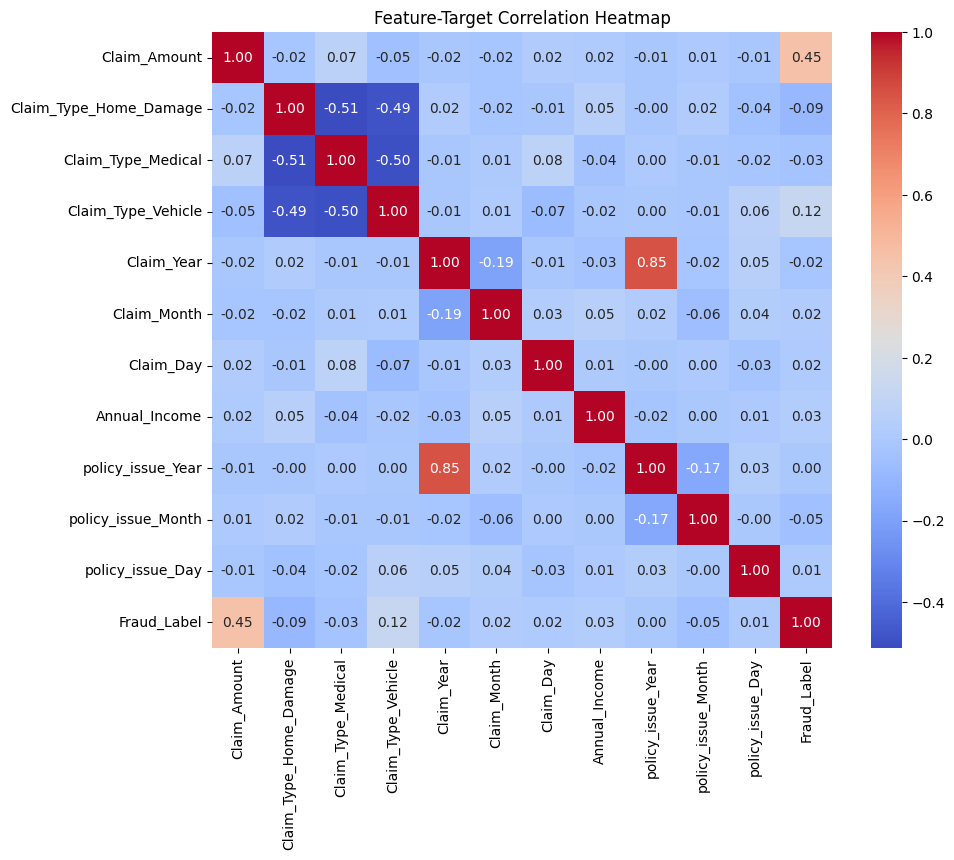

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df3 is already loaded
feature
target

# Combine features and target for correlation
combined = pd.concat([feature, target], axis=1)

# Calculate the correlation matrix
corr_matrix = combined.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature-Target Correlation Heatmap')
plt.show()


# **All Columns are Slightly Corelated both posative and negative**

# Policy Issues year and Claim year highly Posative Correlated

# Fraud and Claim Amount Highly Correlated

In [ ]:
#####################################################################################

In [ ]:
feature.columns

Index(['Claim_Amount', 'Claim_Type_Home_Damage', 'Claim_Type_Medical',
       'Claim_Type_Vehicle', 'Claim_Year', 'Claim_Month', 'Claim_Day',
       'Annual_Income', 'policy_issue_Year', 'policy_issue_Month',
       'policy_issue_Day'],
      dtype='object')

# **Feature Engineering Columns Uses:**

# **1) Using Claim_Amount and Annual_Income** -

    Backend Work diffence of Claim Amount and Annual Income  to
    [ Claim Income Ratio ]  
    
    Result:

    High Claim Income Ratio is Geniune and Low Claim Income Ratio Suspected as Fraud

    Eg:

    Claim Amount Lower than 10% of Annual Income is Genuine Claim Almost but - Claim Amount is More than 25% or 30% is Almost a Fraud

#**2) Claim_Date and Policy_Issuence_Date**

    Policy Issue Date and Claim Date is Less than a year means. suspect as a Fraud more than a year means Genuine

    Result:

    calculate the difference of claim date and policy issues date - value greater than 365 is false suspecius
    and value lesser than 365 is True Suspecius



In [ ]:
##############################################################################################################

# **Machine Learning**

In [ ]:
target.value_counts()

Fraud_Label
0    797
1    203
Name: count, dtype: int64

# Target have only 2 Unique - so its a Binary Classification Type

# **1) Try Logistic Regression**

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


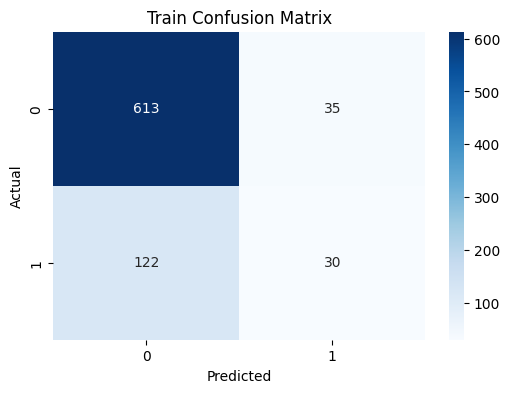

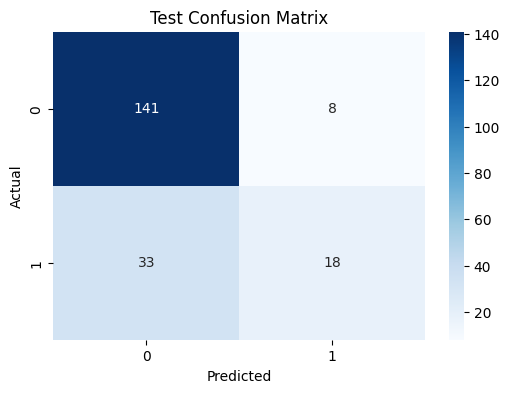

Train Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.95      0.89       648
           1       0.46      0.20      0.28       152

    accuracy                           0.80       800
   macro avg       0.65      0.57      0.58       800
weighted avg       0.76      0.80      0.77       800

Test Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.95      0.87       149
           1       0.69      0.35      0.47        51

    accuracy                           0.80       200
   macro avg       0.75      0.65      0.67       200
weighted avg       0.78      0.80      0.77       200

Train Accuracy: 0.80375
Test Accuracy: 0.795
The model generalizes well!


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'target' is your target column
X = feature
y = target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predictions
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

# Confusion matrices
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(train_cm, 'Train Confusion Matrix')
plot_confusion_matrix(test_cm, 'Test Confusion Matrix')

# Classification reports
print("Train Classification Report:\n", classification_report(y_train, y_train_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

# Accuracy scores
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)


if abs(train_acc - test_acc) < 0.05 and test_acc > 0.75:
    print("The model generalizes well!")
elif train_acc > test_acc + 0.1:
    print("The model is overfitting.")
elif train_acc < 0.75 and test_acc < 0.75:
    print("The model is underfitting.")
else:
    print("The model's performance needs closer inspection.")


**Train Accuracy: 0.80375**

**Test Accuracy: 0.795**

# **The model generalizes well!**

# **But Need to Increase a Test Accuracy**

In [ ]:
# Extract TP, FP, TN, FN from confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

print(f"True Positives: {tp}")
print(f"False Positives: {fp}")
print(f"True Negatives: {tn}")
print(f"False Negatives: {fn}")

precision = tp / (tp + fp) if (tp + fp) != 0 else 0
recall = tp / (tp + fn) if (tp + fn) != 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")


True Positives: 18
False Positives: 8
True Negatives: 141
False Negatives: 33
Precision: 0.69
Recall: 0.35
F1 Score: 0.47


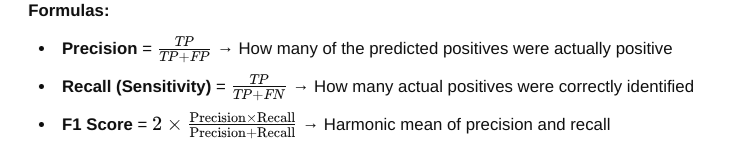

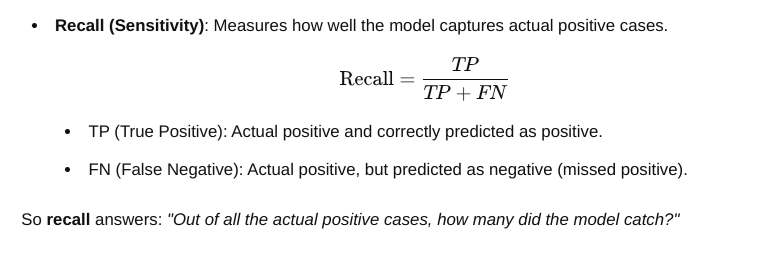

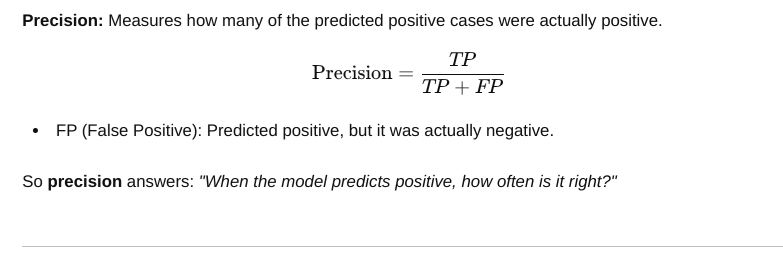

In [ ]:
############################################################################################

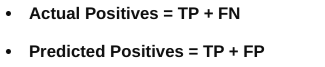

In [ ]:
###############################################################################################

# **To sum up:**

**FP** is about mistakenly calling something positive when it’s actually negative.

**Recall** is about how well we identify the actual positives in the dataset.

**Precision** focuses on how accurate our positive predictions are.

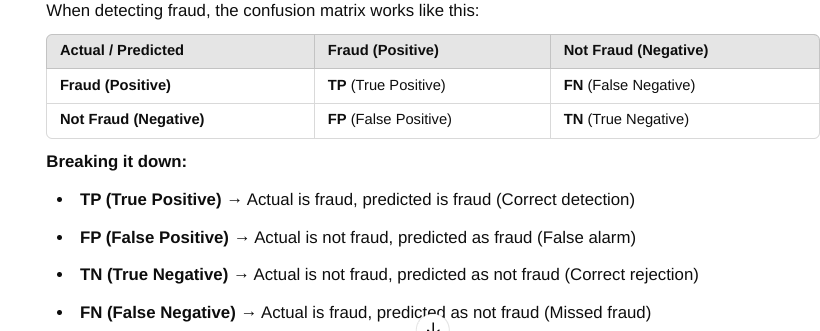

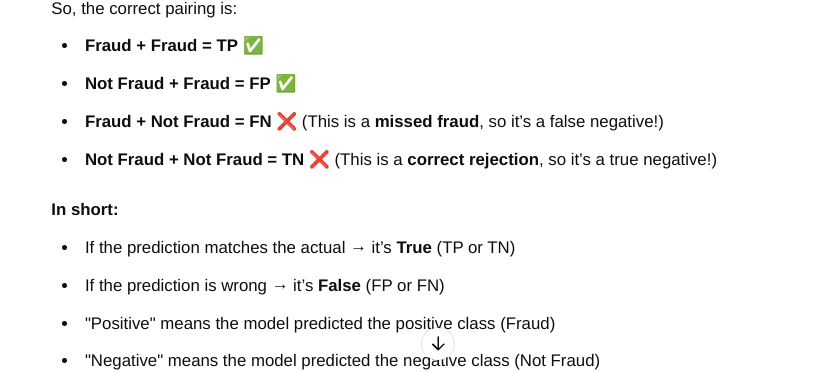

In [ ]:
#########################################################################################

# **2) Try Random Forest Classifier Algorithm**

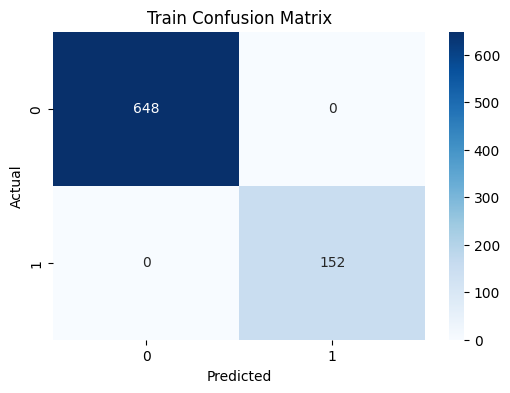

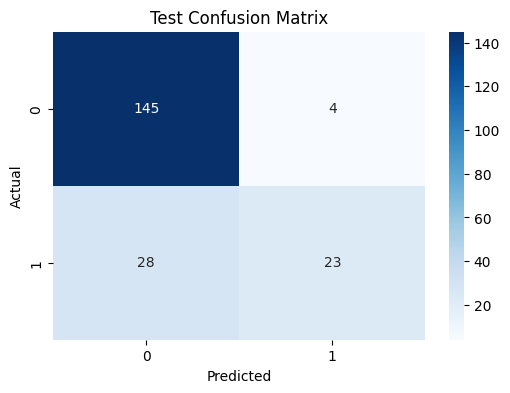

Train Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       648
           1       1.00      1.00      1.00       152

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

Test Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90       149
           1       0.85      0.45      0.59        51

    accuracy                           0.84       200
   macro avg       0.85      0.71      0.75       200
weighted avg       0.84      0.84      0.82       200

Train Accuracy: 1.0
Test Accuracy: 0.84
The model is overfitting.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'target' is your target column
X = feature
y = target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Confusion matrices
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(train_cm, 'Train Confusion Matrix')
plot_confusion_matrix(test_cm, 'Test Confusion Matrix')

# Classification reports
print("Train Classification Report:\n", classification_report(y_train, y_train_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

# Accuracy scores
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

# Model evaluation
if abs(train_acc - test_acc) < 0.05 and test_acc > 0.75:
    print("The model generalizes well!")
elif train_acc > test_acc + 0.1:
    print("The model is overfitting.")
elif train_acc < 0.75 and test_acc < 0.75:
    print("The model is underfitting.")
else:
    print("The model's performance needs closer inspection.")


In [ ]:
# Extract TP, FP, TN, FN from confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

print(f"True Positives: {tp}")
print(f"False Positives: {fp}")
print(f"True Negatives: {tn}")
print(f"False Negatives: {fn}")

precision = tp / (tp + fp) if (tp + fp) != 0 else 0
recall = tp / (tp + fn) if (tp + fn) != 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")


True Positives: 23
False Positives: 4
True Negatives: 145
False Negatives: 28
Precision: 0.85
Recall: 0.45
F1 Score: 0.59


Train Accuracy: 1.0

Test Accuracy: 0.84

**Model is Overfit**

True Positives: 23,
False Positives: 4,
True Negatives: 145,
False Negatives: 28

Precision: 0.85
Recall: 0.45

F1 Score: 0.59

**F1 only stays high when both precision and recall are balanced and strong.**


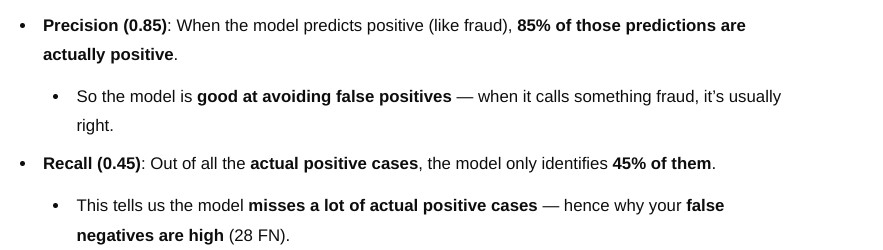

In [ ]:
###################################################################################################################

# **3) Try XG Boosting**

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:38:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


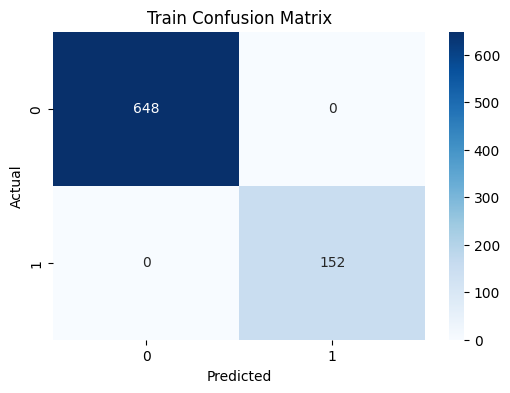

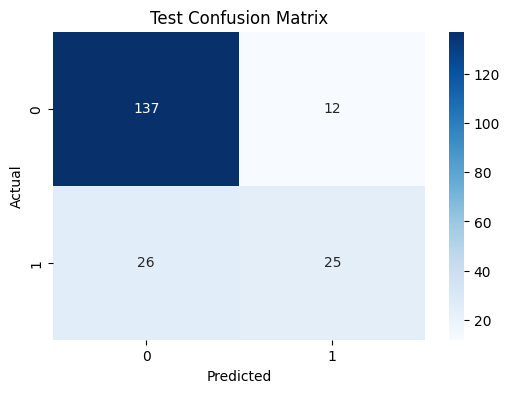

Train Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       648
           1       1.00      1.00      1.00       152

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

Test Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88       149
           1       0.68      0.49      0.57        51

    accuracy                           0.81       200
   macro avg       0.76      0.70      0.72       200
weighted avg       0.80      0.81      0.80       200

Train Accuracy: 1.0
Test Accuracy: 0.81
The model is overfitting.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'target' is your target column
X = feature
y = target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost model
xgb_model = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Predictions
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Confusion matrices
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(train_cm, 'Train Confusion Matrix')
plot_confusion_matrix(test_cm, 'Test Confusion Matrix')

# Classification reports
print("Train Classification Report:\n", classification_report(y_train, y_train_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

# Accuracy scores
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

# Model evaluation
if abs(train_acc - test_acc) < 0.05 and test_acc > 0.75:
    print("The model generalizes well!")
elif train_acc > test_acc + 0.1:
    print("The model is overfitting.")
elif train_acc < 0.75 and test_acc < 0.75:
    print("The model is underfitting.")
else:
    print("The model's performance needs closer inspection.")


In [ ]:
# Extract TP, FP, TN, FN from confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

print(f"True Positives: {tp}")
print(f"False Positives: {fp}")
print(f"True Negatives: {tn}")
print(f"False Negatives: {fn}")

precision = tp / (tp + fp) if (tp + fp) != 0 else 0
recall = tp / (tp + fn) if (tp + fn) != 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")


True Positives: 25
False Positives: 12
True Negatives: 137
False Negatives: 26
Precision: 0.68
Recall: 0.49
F1 Score: 0.57


# **Combare to Randomforest xg boosting show low accuracy and low recall shows**

In [ ]:
#################################################################################################################

# **4) Try Support Vector Machine (SVM)**

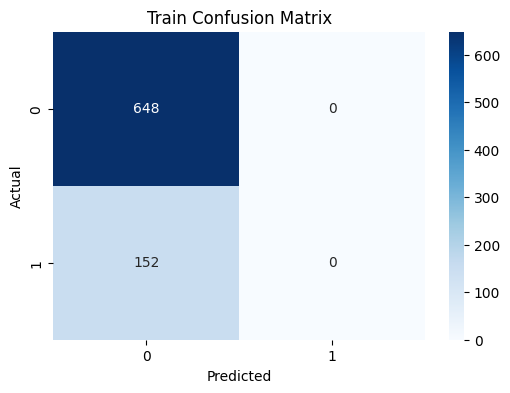

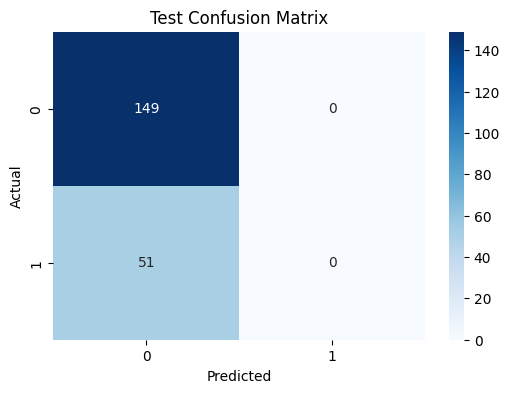

Train Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.90       648
           1       0.00      0.00      0.00       152

    accuracy                           0.81       800
   macro avg       0.41      0.50      0.45       800
weighted avg       0.66      0.81      0.72       800

Test Classification Report:
               precision    recall  f1-score   support

           0       0.74      1.00      0.85       149
           1       0.00      0.00      0.00        51

    accuracy                           0.74       200
   macro avg       0.37      0.50      0.43       200
weighted avg       0.56      0.74      0.64       200

Train Accuracy: 0.81
Test Accuracy: 0.745
The model's performance needs closer inspection.


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'target' is your target column
X = feature
y = target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Support Vector Machine model
svm_model = SVC(kernel='rbf', random_state=42, probability=True)
svm_model.fit(X_train, y_train)

# Predictions
y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)

# Confusion matrices
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(train_cm, 'Train Confusion Matrix')
plot_confusion_matrix(test_cm, 'Test Confusion Matrix')

# Classification reports
print("Train Classification Report:\n", classification_report(y_train, y_train_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

# Accuracy scores
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

# Model evaluation
if abs(train_acc - test_acc) < 0.05 and test_acc > 0.75:
    print("The model generalizes well!")
elif train_acc > test_acc + 0.1:
    print("The model is overfitting.")
elif train_acc < 0.75 and test_acc < 0.75:
    print("The model is underfitting.")
else:
    print("The model's performance needs closer inspection.")


In [ ]:
# Extract TP, FP, TN, FN from confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

print(f"True Positives: {tp}")
print(f"False Positives: {fp}")
print(f"True Negatives: {tn}")
print(f"False Negatives: {fn}")

precision = tp / (tp + fp) if (tp + fp) != 0 else 0
recall = tp / (tp + fn) if (tp + fn) != 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")


True Positives: 0
False Positives: 0
True Negatives: 149
False Negatives: 51
Precision: 0.00
Recall: 0.00
F1 Score: 0.00


**Train Accuracy: 0.81**

**Test Accuracy: 0.74**

Precision: 0.00

Recall: 0.00

F1 Score: 0.00

# **Feature scaling: SVMs are sensitive to feature scale — try normalizing or standardizing your features (like using StandardScaler).**

In [ ]:
################################################################################################

# **5) Try KNN (K-Nearest Neighbour) Classifier**

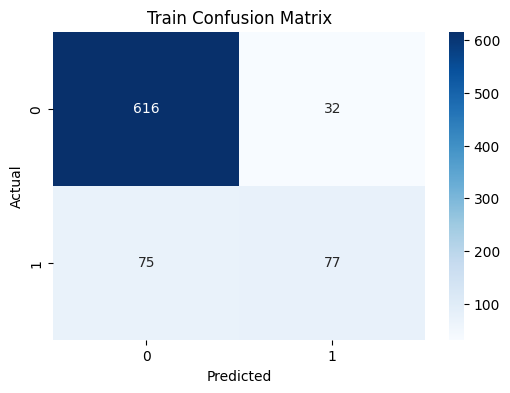

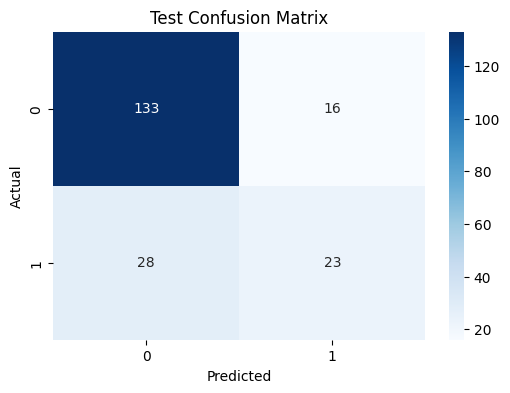

Train Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92       648
           1       0.71      0.51      0.59       152

    accuracy                           0.87       800
   macro avg       0.80      0.73      0.76       800
weighted avg       0.86      0.87      0.86       800

Test Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       149
           1       0.59      0.45      0.51        51

    accuracy                           0.78       200
   macro avg       0.71      0.67      0.68       200
weighted avg       0.77      0.78      0.77       200

Train Accuracy: 0.86625
Test Accuracy: 0.78
The model's performance needs closer inspection.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'target' is your target column
X = feature
y = target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# K-Nearest Neighbors model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predictions
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)

# Confusion matrices
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(train_cm, 'Train Confusion Matrix')
plot_confusion_matrix(test_cm, 'Test Confusion Matrix')

# Classification reports
print("Train Classification Report:\n", classification_report(y_train, y_train_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

# Accuracy scores
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

# Model evaluation
if abs(train_acc - test_acc) < 0.05 and test_acc > 0.75:
    print("The model generalizes well!")
elif train_acc > test_acc + 0.1:
    print("The model is overfitting.")
elif train_acc < 0.75 and test_acc < 0.75:
    print("The model is underfitting.")
else:
    print("The model's performance needs closer inspection.")


In [ ]:
# Extract TP, FP, TN, FN from confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

print(f"True Positives: {tp}")
print(f"False Positives: {fp}")
print(f"True Negatives: {tn}")
print(f"False Negatives: {fn}")

precision = tp / (tp + fp) if (tp + fp) != 0 else 0
recall = tp / (tp + fn) if (tp + fn) != 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")


True Positives: 23
False Positives: 16
True Negatives: 133
False Negatives: 28
Precision: 0.59
Recall: 0.45
F1 Score: 0.51


**Train Accuracy: 0.86**

**Test Accuracy: 0.78**

but precision, recall, f1 score value was very low

In [ ]:
####################################################################################################################

# **6) Now Check Dataset is Balanced or Not**

             Count  Percentage
Fraud_Label                   
0              797        79.7
1              203        20.3
Balance Ratio: 0.25
The dataset is imbalanced.


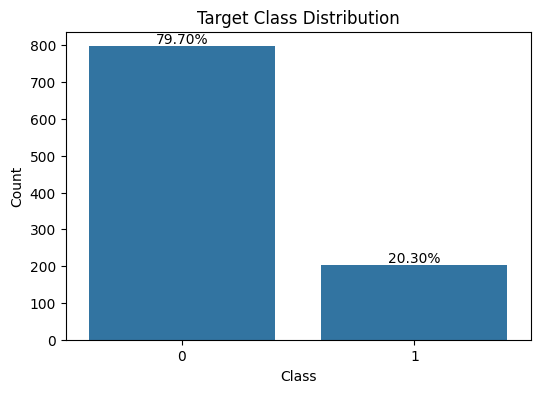

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'target' is your target column
class_distribution = target.value_counts()
class_percentage = (class_distribution / class_distribution.sum()) * 100

# Printing class counts and percentages
print(pd.concat([class_distribution, class_percentage.round(2)], axis=1, keys=['Count', 'Percentage']))

# Checking the balance percentage
balance_ratio = class_distribution.min() / class_distribution.max()
print(f"Balance Ratio: {balance_ratio:.2f}")

if balance_ratio > 0.8:  # You can adjust this threshold
    print("The dataset is balanced.")
else:
    print("The dataset is imbalanced.")

# Visualizing class distribution with percentages
plt.figure(figsize=(6, 4))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.title('Target Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

# Adding percentage labels on the bars
for i, val in enumerate(class_percentage):
    plt.text(i, class_distribution.values[i], f'{val:.2f}%', ha='center', va='bottom')

plt.show()


# **Dataset is Imbalanced**

In [ ]:
##################################################################################################

using SMOTE -> Synthetic Oversambling for Minority Class

**Negative:**

its add Synthtic Data on oversampling

#####################################################

so i am trying cross validation - **Stratified K-Fold to Concentrate Particular Class Based on Percentage**

# **7) Random Forest - Stratified K Fold**

# **Using Folds - 2 & Focusing Minority Class is 21% and Majority Class is 79%**

Cross-Validation Accuracy Scores: [0.838 0.838]
Mean CV Accuracy: 0.84


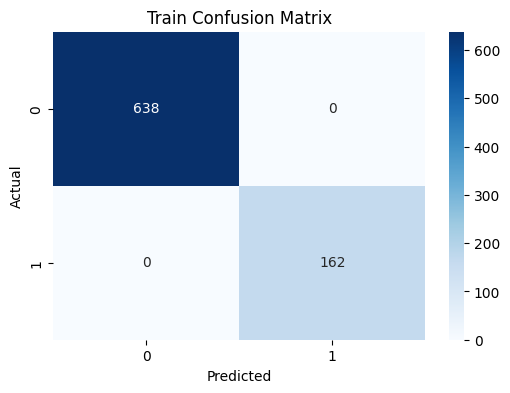

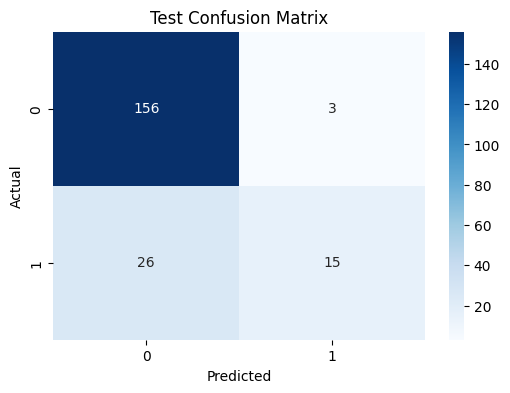

Train Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       638
           1       1.00      1.00      1.00       162

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

Test Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.91       159
           1       0.83      0.37      0.51        41

    accuracy                           0.85       200
   macro avg       0.85      0.67      0.71       200
weighted avg       0.85      0.85      0.83       200

Train Accuracy: 1.0
Test Accuracy: 0.855
The model is overfitting.


In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'target' is your target column
X = feature
y = target

# Class distribution focus: 21% class 0, 79% class 1
class_distribution = {0: 0.21, 1: 0.79}

# Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

# Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight=class_distribution)

# Cross-validation accuracy
cv_scores = cross_val_score(rf_model, X, y, cv=skf, scoring='accuracy')
print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean CV Accuracy: {cv_scores.mean():.2f}')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Fit the model
rf_model.fit(X_train, y_train)

# Predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Confusion matrices
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(train_cm, 'Train Confusion Matrix')
plot_confusion_matrix(test_cm, 'Test Confusion Matrix')

# Classification reports
print("Train Classification Report:\n", classification_report(y_train, y_train_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

# Accuracy scores
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

# Model evaluation
if abs(train_acc - test_acc) < 0.05 and test_acc > 0.75:
    print("The model generalizes well!")
elif train_acc > test_acc + 0.1:
    print("The model is overfitting.")
elif train_acc < 0.75 and test_acc < 0.75:
    print("The model is underfitting.")
else:
    print("The model's performance needs closer inspection.")


In [ ]:
# Extract TP, FP, TN, FN from confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

print(f"True Positives: {tp}")
print(f"False Positives: {fp}")
print(f"True Negatives: {tn}")
print(f"False Negatives: {fn}")

precision = tp / (tp + fp) if (tp + fp) != 0 else 0
recall = tp / (tp + fn) if (tp + fn) != 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")


True Positives: 15
False Positives: 3
True Negatives: 156
False Negatives: 26
Precision: 0.83
Recall: 0.37
F1 Score: 0.51


In [ ]:
###################################################################################################

# **8) Use Hyperparameter Tuning for Random Forest**

Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 150}


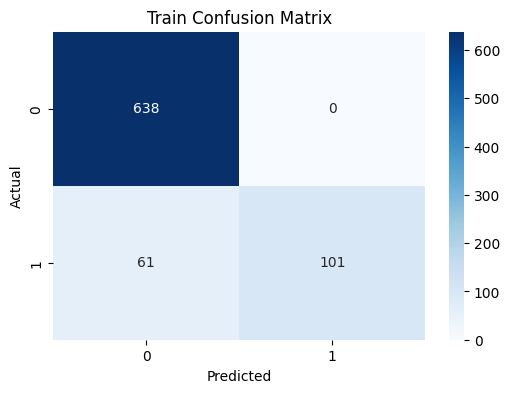

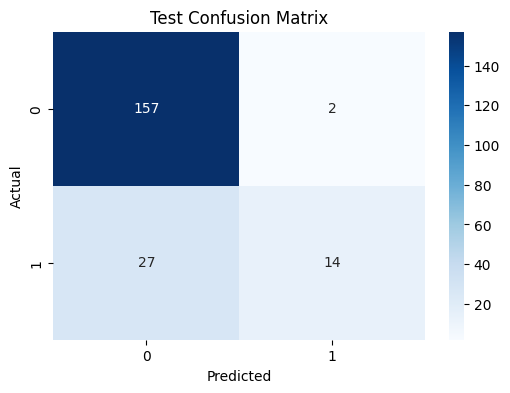

Train Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95       638
           1       1.00      0.62      0.77       162

    accuracy                           0.92       800
   macro avg       0.96      0.81      0.86       800
weighted avg       0.93      0.92      0.92       800

Test Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.92       159
           1       0.88      0.34      0.49        41

    accuracy                           0.85       200
   macro avg       0.86      0.66      0.70       200
weighted avg       0.86      0.85      0.83       200

Train Accuracy: 0.92375
Test Accuracy: 0.855
The model's performance needs closer inspection.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'target' is your target column
X = feature
y = target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Grid Search with cross-validation
grid_search = GridSearchCV(rf_model, param_grid, cv=skf, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and best estimator
print(f"Best Parameters: {grid_search.best_params_}")
best_rf_model = grid_search.best_estimator_

# Predictions
y_train_pred = best_rf_model.predict(X_train)
y_test_pred = best_rf_model.predict(X_test)

# Confusion matrices
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(train_cm, 'Train Confusion Matrix')
plot_confusion_matrix(test_cm, 'Test Confusion Matrix')

# Classification reports
print("Train Classification Report:\n", classification_report(y_train, y_train_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

# Accuracy scores
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

# Model evaluation
if abs(train_acc - test_acc) < 0.05 and test_acc > 0.75:
    print("The model generalizes well!")
elif train_acc > test_acc + 0.1:
    print("The model is overfitting.")
elif train_acc < 0.75 and test_acc < 0.75:
    print("The model is underfitting.")
else:
    print("The model's performance needs closer inspection.")


In [ ]:
# Extract TP, FP, TN, FN from confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

print(f"True Positives: {tp}")
print(f"False Positives: {fp}")
print(f"True Negatives: {tn}")
print(f"False Negatives: {fn}")

precision = tp / (tp + fp) if (tp + fp) != 0 else 0
recall = tp / (tp + fn) if (tp + fn) != 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")


True Positives: 14
False Positives: 2
True Negatives: 157
False Negatives: 27
Precision: 0.88
Recall: 0.34
F1 Score: 0.49


**Train Accuracy: 0.92375**

**Test Accuracy: 0.855**

# **The model's performance needs closer inspection.**

In [ ]:
#####################################################################################################

# **9) Use Hyperparameter Tuning for KNN Classifier**

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}


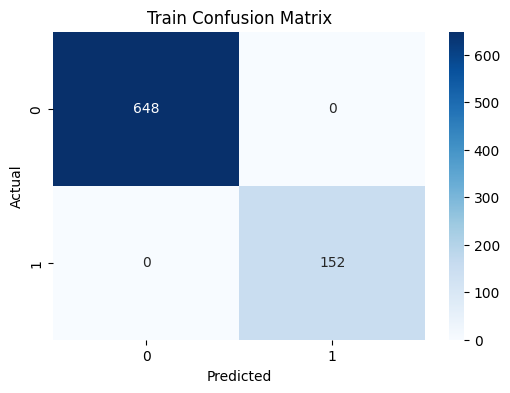

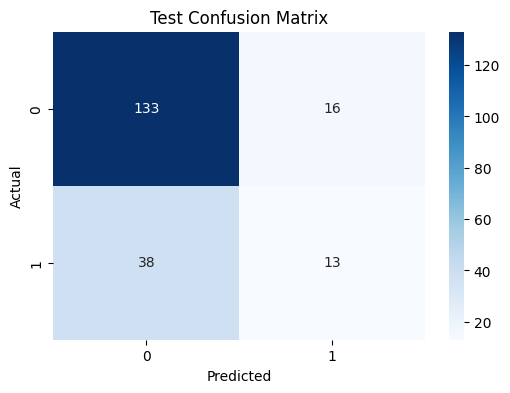

Train Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       648
           1       1.00      1.00      1.00       152

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

Test Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.89      0.83       149
           1       0.45      0.25      0.33        51

    accuracy                           0.73       200
   macro avg       0.61      0.57      0.58       200
weighted avg       0.69      0.73      0.70       200

Train Accuracy: 1.0
Test Accuracy: 0.73
The model is overfitting.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'target' is your target column
X = feature
y = target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# GridSearchCV
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and best estimator
print(f"Best Parameters: {grid_search.best_params_}")
best_knn = grid_search.best_estimator_

# Predictions with best KNN model
y_train_pred = best_knn.predict(X_train)
y_test_pred = best_knn.predict(X_test)

# Confusion matrices
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(train_cm, 'Train Confusion Matrix')
plot_confusion_matrix(test_cm, 'Test Confusion Matrix')

# Classification reports
print("Train Classification Report:\n", classification_report(y_train, y_train_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

# Accuracy scores
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

# Model evaluation
if abs(train_acc - test_acc) < 0.05 and test_acc > 0.75:
    print("The model generalizes well!")
elif train_acc > test_acc + 0.1:
    print("The model is overfitting.")
elif train_acc < 0.75 and test_acc < 0.75:
    print("The model is underfitting.")
else:
    print("The model's performance needs closer inspection.")


In [ ]:
# Extract TP, FP, TN, FN from confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

print(f"True Positives: {tp}")
print(f"False Positives: {fp}")
print(f"True Negatives: {tn}")
print(f"False Negatives: {fn}")

precision = tp / (tp + fp) if (tp + fp) != 0 else 0
recall = tp / (tp + fn) if (tp + fn) != 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")


True Positives: 13
False Positives: 16
True Negatives: 133
False Negatives: 38
Precision: 0.45
Recall: 0.25
F1 Score: 0.33


# **Not get Accuracy for KNN Hyperparameter Tuning**

In [ ]:
#############################################################################################

# **Deep Learning is Sensitive for Unscalled Date - So Scaled Claim amount and Annual Income**

In [ ]:
feature.head()

Claim_Amount  Claim_Type_Home_Damage  Claim_Type_Medical  \
0      32151.63                       0                   1   
1       7407.13                       0                   1   
2       4803.47                       0                   0   
3      12016.71                       1                   0   
4      32669.28                       1                   0   

   Claim_Type_Vehicle  Claim_Year  Claim_Month  Claim_Day  Annual_Income  \
0                   0        2021            7         19         126531   
1                   0        2020            8          9         184130   
2                   1        2020            4         21          82529   
3                   0        2023            2         13         185307   
4                   0        2021           11         15          74026   

   policy_issue_Year  policy_issue_Month  policy_issue_Day  
0               2020                  11                21  
1               2019                   8                 3  
2               2017                   8                23  
3               2022                   3                 2  
4               2020                  12                10

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Selecting the features
features_to_scale = feature[['Claim_Amount', 'Annual_Income']]

# Initializing and applying MinMaxScaler
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features_to_scale)

# Replacing the original columns with scaled values
feature[['Claim_Amount', 'Annual_Income']] = features_scaled

# Checking the result
print(feature[['Claim_Amount', 'Annual_Income']].head())

   Claim_Amount  Annual_Income
0      0.639475       0.567695
1      0.138698       0.906766
2      0.086005       0.308666
3      0.231986       0.913694
4      0.649951       0.258611


<ipython-input-56-e2e8f66f39ae>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature[['Claim_Amount', 'Annual_Income']] = features_scaled


In [ ]:
feature.head()

Claim_Amount  Claim_Type_Home_Damage  Claim_Type_Medical  \
0      0.639475                       0                   1   
1      0.138698                       0                   1   
2      0.086005                       0                   0   
3      0.231986                       1                   0   
4      0.649951                       1                   0   

   Claim_Type_Vehicle  Claim_Year  Claim_Month  Claim_Day  Annual_Income  \
0                   0        2021            7         19       0.567695   
1                   0        2020            8          9       0.906766   
2                   1        2020            4         21       0.308666   
3                   0        2023            2         13       0.913694   
4                   0        2021           11         15       0.258611   

   policy_issue_Year  policy_issue_Month  policy_issue_Day  
0               2020                  11                21  
1               2019                   8                 3  
2               2017                   8                23  
3               2022                   3                 2  
4               2020                  12                10

# **10) Pytorch - Deep Learning**

Epoch [1/20], Loss: 3.4408
Epoch [2/20], Loss: 6.7709
Epoch [3/20], Loss: 1.2767
Epoch [4/20], Loss: 2.7172
Epoch [5/20], Loss: 3.2311
Epoch [6/20], Loss: 3.0725
Epoch [7/20], Loss: 2.3979
Epoch [8/20], Loss: 1.3145
Epoch [9/20], Loss: 0.9386
Epoch [10/20], Loss: 1.2989
Epoch [11/20], Loss: 0.8225
Epoch [12/20], Loss: 1.3909
Epoch [13/20], Loss: 1.5441
Epoch [14/20], Loss: 1.3207
Epoch [15/20], Loss: 0.7850
Epoch [16/20], Loss: 0.8226
Epoch [17/20], Loss: 0.8857
Epoch [18/20], Loss: 0.6529
Epoch [19/20], Loss: 0.9810
Epoch [20/20], Loss: 0.9930
Train Accuracy: 0.81
Test Accuracy: 0.74
Test Classification Report:
               precision    recall  f1-score   support

           0       0.74      1.00      0.85       149
           1       0.00      0.00      0.00        51

    accuracy                           0.74       200
   macro avg       0.37      0.50      0.43       200
weighted avg       0.56      0.74      0.64       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


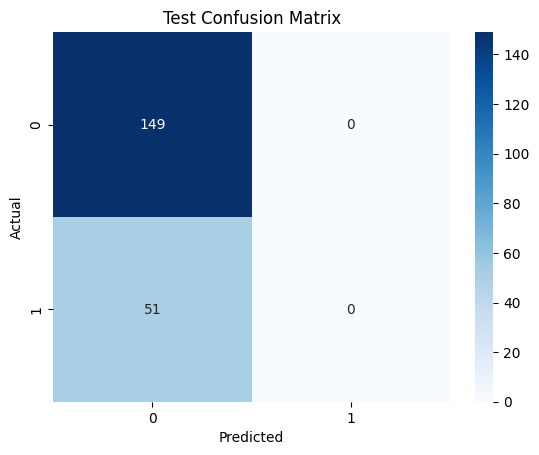

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'target' is your target column
X = feature
y = target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train.values, dtype=torch.float32)
X_test = torch.tensor(X_test.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.long)
y_test = torch.tensor(y_test.values, dtype=torch.long)

# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 2)  # Assuming binary classification

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Model setup
input_size = X_train.shape[1]
model = SimpleNN(input_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 20
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Evaluation
model.eval()
with torch.no_grad():
    train_preds = model(X_train).argmax(dim=1)
    test_preds = model(X_test).argmax(dim=1)

# Metrics
train_acc = accuracy_score(y_train, train_preds)
test_acc = accuracy_score(y_test, test_preds)
print(f"Train Accuracy: {train_acc:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")

print("Test Classification Report:\n", classification_report(y_test, test_preds))

# Confusion matrix
cm = confusion_matrix(y_test, test_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# **test accuracy higher:**

# **Tuning the Neural Network Architecture:**

Add more layers or neurons.

Try different activation functions like ReLU, LeakyReLU, or GELU.

Experiment with batch normalization or dropout to prevent overfitting.

# **Optimizers and Learning Rate:**

Try different optimizers like AdamW, RMSprop, or SGD.

Tune the learning rate — sometimes lowering it helps generalization.


<ipython-input-59-28fdc0365448>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Claim_Income_Ratio'] = X['Claim_Amount'] / (X['Annual_Income'] + 1e-5)


Epoch [1/100], Loss: 0.6977, Test Accuracy: 0.5266
Epoch [2/100], Loss: 0.6515, Test Accuracy: 0.5266
Epoch [3/100], Loss: 0.6072, Test Accuracy: 0.6834
Epoch [4/100], Loss: 0.5628, Test Accuracy: 0.6865
Epoch [5/100], Loss: 0.5174, Test Accuracy: 0.7241
Epoch [6/100], Loss: 0.4782, Test Accuracy: 0.6677
Epoch [7/100], Loss: 0.4506, Test Accuracy: 0.6708
Epoch [8/100], Loss: 0.4308, Test Accuracy: 0.6803
Epoch [9/100], Loss: 0.4237, Test Accuracy: 0.6928
Epoch [10/100], Loss: 0.4157, Test Accuracy: 0.6991
Epoch [11/100], Loss: 0.4046, Test Accuracy: 0.7241
Epoch [12/100], Loss: 0.4080, Test Accuracy: 0.7492
Epoch [13/100], Loss: 0.4053, Test Accuracy: 0.7492
Epoch [14/100], Loss: 0.3934, Test Accuracy: 0.7398
Epoch [15/100], Loss: 0.3963, Test Accuracy: 0.7461
Epoch [16/100], Loss: 0.3887, Test Accuracy: 0.7586
Epoch [17/100], Loss: 0.3780, Test Accuracy: 0.7586
Epoch [18/100], Loss: 0.3781, Test Accuracy: 0.7618
Epoch [19/100], Loss: 0.3727, Test Accuracy: 0.7555
Epoch [20/100], Loss:

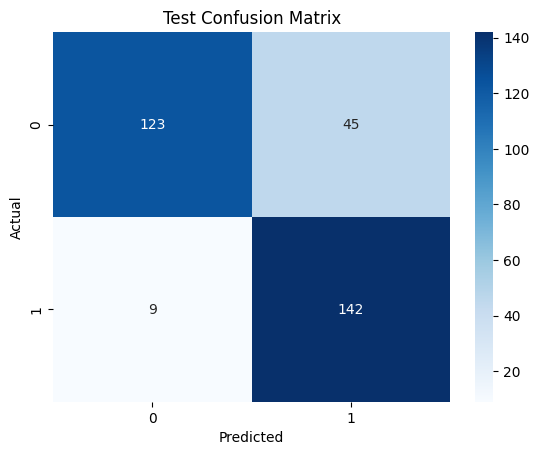

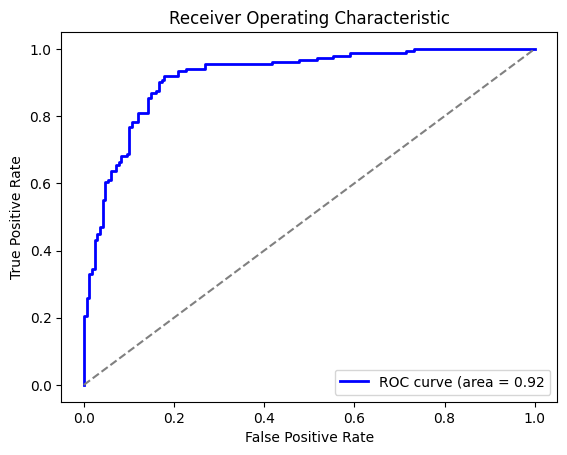

Model generalizes well


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE

# Assuming df is your DataFrame and 'target' is your target column
X = feature
y = target

# Feature engineering: Adding interaction feature
X['Claim_Income_Ratio'] = X['Claim_Amount'] / (X['Annual_Income'] + 1e-5)

# Scaling features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Handling class imbalance with SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Compute class weights
class_weights = compute_class_weight('balanced', classes=torch.unique(torch.tensor(y)).numpy(), y=y)
class_weights = torch.tensor(class_weights, dtype=torch.float32)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.long)
y_test = torch.tensor(y_test.values, dtype=torch.long)

# Define an enhanced neural network with more capacity
class EnhancedNN(nn.Module):
    def __init__(self, input_size):
        super(EnhancedNN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_size, 512),
            nn.BatchNorm1d(512),
            nn.LeakyReLU(),
            nn.Dropout(0.2),
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, 128),
            nn.LeakyReLU(),
            nn.Linear(128, 64),
            nn.LeakyReLU(),
            nn.Linear(64, 2)
        )

    def forward(self, x):
        return self.net(x)

# Model setup
input_size = X_train.shape[1]
model = EnhancedNN(input_size)
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-5)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=50)

# Training loop
epochs = 100
best_test_acc = 0
patience, patience_counter = 15, 0
min_target_acc = 0.85

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    scheduler.step()

    model.eval()
    with torch.no_grad():
        test_preds = model(X_test).argmax(dim=1)
    test_acc = accuracy_score(y_test, test_preds)

    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Test Accuracy: {test_acc:.4f}')

    if test_acc > best_test_acc:
        best_test_acc = test_acc
        patience_counter = 0
    else:
        patience_counter += 1

    if patience_counter >= patience and best_test_acc >= min_target_acc:
        print("Early stopping triggered")
        break

# Final evaluation
model.eval()
with torch.no_grad():
    train_preds = model(X_train).argmax(dim=1)
    test_probs = model(X_test)
    test_preds = test_probs.argmax(dim=1)

train_acc = accuracy_score(y_train, train_preds)
test_acc = accuracy_score(y_test, test_preds)
print(f"Final Train Accuracy: {train_acc:.2f}")
print(f"Final Test Accuracy: {test_acc:.2f}")
print("Test Classification Report:\n", classification_report(y_test, test_preds))

# Confusion matrix
cm = confusion_matrix(y_test, test_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC and AUC curve
probs = torch.softmax(test_probs, dim=1)[:, 1].cpu().numpy()
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Check for overfitting or underfitting
if train_acc > test_acc + 0.1:
    print("Model is overfitting")
elif test_acc < 0.7:
    print("Model is underfitting")
else:
    print("Model generalizes well")


In [ ]:
# Extract TP, TN, FP, FN
TN, FP, FN, TP = cm.ravel()
print(f"True Positives (TP): {TP} - Correctly predicted positive cases")
print(f"True Negatives (TN): {TN} - Correctly predicted negative cases")
print(f"False Positives (FP): {FP} - Incorrectly predicted positive cases (actual negative)")
print(f"False Negatives (FN): {FN} - Incorrectly predicted negative cases (actual positive)")

True Positives (TP): 142 - Correctly predicted positive cases
True Negatives (TN): 123 - Correctly predicted negative cases
False Positives (FP): 45 - Incorrectly predicted positive cases (actual negative)
False Negatives (FN): 9 - Incorrectly predicted negative cases (actual positive)


**True Positive (TP)**: Predicted 1, Actual 1

**True Negative (TN)**: Predicted 0, Actual 0

**False Positive (FP)**: Predicted 1, Actual 0

**False Negative (FN)**: Predicted 0, Actual 1

# **ROC Curve Area is 0.93 is near to 1 so its very Good Score: - Becaue its Increase True Posative Rate from False Posative**

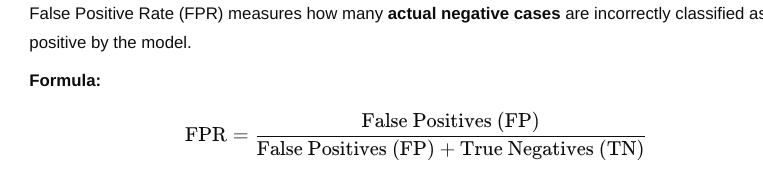

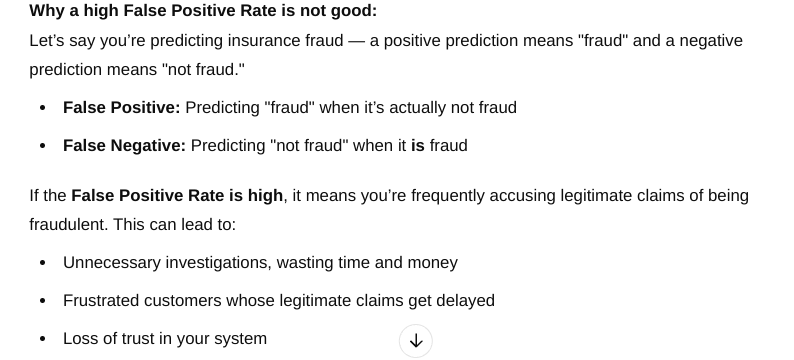

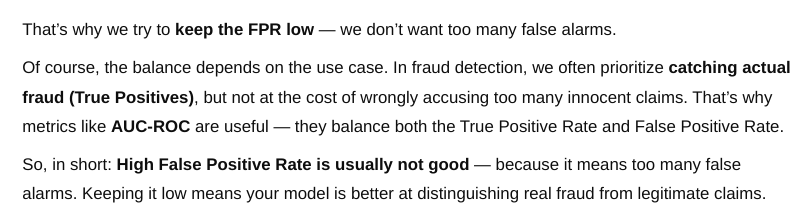

Epoch [99/100], Loss: 0.1990, Test Accuracy: 0.8339
Early stopping triggered


**Final Train Accuracy: 0.90**

**Final Test Accuracy: 0.83**

**loss [ Cost Function is Loss: 0.1990 ]**

# **99th Epoch out of total 100 Epoch attain Accuracy**



In [ ]:
print("Test Classification Report:\n", classification_report(y_test, test_preds))

Test Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.73      0.82       168
           1       0.76      0.94      0.84       151

    accuracy                           0.83       319
   macro avg       0.85      0.84      0.83       319
weighted avg       0.85      0.83      0.83       319



# **Overall Metrics:**

Accuracy: 0.83

**Macro Average:**

Precision: 0.76

Recall: 0.71

F1-Score: 0.73

**Weighted Average:**

Precision: 0.85

Recall: 0.83

F1-Score: 0.83

# **In your report:**

**Macro Average** (Precision: 0.76, Recall: 0.71, F1: 0.73)

 — shows how well the model performs across both classes **equally**, even though Class 1 has fewer samples.

**Weighted Average** (Precision: 0.80, Recall: 0.81, F1: 0.81)

 — **gives more importance** to Class 0’s performance because it has more samples, making it a more realistic reflection of overall performance.

In [ ]:
##############################################################################################

**recall** is often more important, especially in situations like insurance fraud detection or legal claims where missing a positive case (like a fraudulent claim) could lead to bigger consequences

In [ ]:
##############################################################################################

In [ ]:
###################################################################################################

# **Run Code Without Scaling**

In [ ]:
df3_feature.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Claim_ID', 'Claim_Date',
       'Policyholder_ID', 'Claim_Amount', 'Suspicious_Flags', 'Fraud_Label',
       'Claim_Type_Home_Damage', 'Claim_Type_Medical', 'Claim_Type_Vehicle',
       'Claim_Year', 'Claim_Month', 'Claim_Day', 'Annual_Income',
       'Claim_to_Income_Ratio', 'Policy_Issuance_Date', 'Days_Since_Issuance',
       'Short_Period_Claim', 'Elliptic_Anomaly', 'Isolation_Anomaly',
       'LOF_Anomaly', 'Fraud_Probability_Score', 'policy_issue_Year',
       'policy_issue_Month', 'policy_issue_Day'],
      dtype='object')

In [ ]:
df3_feature.tail()

Unnamed: 0.1  Unnamed: 0                              Claim_ID  \
995           995         995  d7e323cf-6d65-4847-8229-411611529a73   
996           996         996  54470290-4640-4b2a-9c02-28afb1d29457   
997           997         997  92451cc4-1bfb-4b3d-8ee5-2f639caf8df1   
998           998         998  9ad2bb72-b04b-4584-b95c-ec2d7bd15655   
999           999         999  42791490-5105-44f9-9909-49aa9bdd3d7a   

     Claim_Date                       Policyholder_ID  Claim_Amount  \
995  2022-12-04  1f3cea1d-2271-47ca-b887-73ed4af715b7      33254.81   
996  2022-10-22  35845d71-b221-41c5-b5b8-6d0a864f36dd      32249.52   
997  2023-10-28  16718639-fcb8-4f9e-8769-0baaa104bdce      49395.69   
998  2024-11-04  6d53628b-4985-4b79-b4f1-36fcfc7cbe71      46751.39   
999  2022-10-19  ed56c714-5a96-41f5-9f8c-eda5feb9ea24      43536.07   

     Suspicious_Flags  Fraud_Label  Claim_Type_Home_Damage  \
995                 0            0                       0   
996                 0            0                       0   
997                 1            1                       0   
998                 0            0                       1   
999                 0            0                       0   

     Claim_Type_Medical  ...  Policy_Issuance_Date  Days_Since_Issuance  \
995                   1  ...            2021-10-23                  407   
996                   1  ...            2022-05-10                  165   
997                   1  ...            2021-02-14                  986   
998                   0  ...            2023-03-19                  596   
999                   1  ...            2020-06-20                  851   

     Short_Period_Claim  Elliptic_Anomaly  Isolation_Anomaly  LOF_Anomaly  \
995               False            Normal                  0       Normal   
996                True            Normal                  0       Normal   
997               False           Anomaly                  1      Anomaly   
998               False           Anomaly                  1      Anomaly   
999               False            Normal                  0       Normal   

    Fraud_Probability_Score  policy_issue_Year  policy_issue_Month  \
995                0.203503               2021                  10   
996                0.000000               2022                   5   
997                0.000000               2021                   2   
998                0.195443               2023                   3   
999                0.000000               2020                   6   

    policy_issue_Day  
995               23  
996               10  
997               14  
998               19  
999               20  

[5 rows x 26 columns]

In [ ]:
import pandas as pd

# Load your dataset
df = df3_feature

# Filter only fraud cases (label == 1)
fraud_cases = df[df['Fraud_Label'] == 1]

genuine_cases = df[df['Fraud_Label'] == 0]

# Find the minimum Claim_Income_Ratio for fraud cases
min_fraud_ratio = fraud_cases['Claim_to_Income_Ratio'].min()
max_fraud_ratio = fraud_cases['Claim_to_Income_Ratio'].max()

min_genuine_ratio = genuine_cases['Claim_to_Income_Ratio'].min()
max_genuine_ratio = genuine_cases['Claim_to_Income_Ratio'].max()

print(f"Minimum Claim_Income_Ratio marked as fraud: {min_fraud_ratio}")
print(f"Maximum Claim_Income_Ratio marked as fraud: {max_fraud_ratio}")

print(f"Minimum Claim_Income_Ratio marked as Genuine: {min_genuine_ratio}")
print(f"Maximum Claim_Income_Ratio marked as Genuine: {max_genuine_ratio}")

Minimum Claim_Income_Ratio marked as fraud: 0.0095334377096846
Maximum Claim_Income_Ratio marked as fraud: 1.6130785056495331
Minimum Claim_Income_Ratio marked as Genuine: 0.0054573378194465
Maximum Claim_Income_Ratio marked as Genuine: 1.5279230668671155


In [ ]:
df3['Fraud_Label'].value_counts()

Fraud_Label
0    797
1    203
Name: count, dtype: int64

In [ ]:
df3_feature['Claim_Amount'].min()

553.77

In [ ]:
df3_feature['Claim_Amount'].max()

49965.98

In [ ]:
df3_feature['Annual_Income'].min()

30095

In [ ]:
df3_feature['Annual_Income'].max()

199968

In [ ]:
feature1=df3_feature[['Claim_Amount','Claim_Type_Home_Damage','Claim_Type_Medical','Claim_Type_Vehicle','Claim_Year', 'Claim_Month', 'Claim_Day', 'Annual_Income','policy_issue_Year','policy_issue_Month', 'policy_issue_Day']]
target1=df3_feature['Fraud_Label']

<ipython-input-72-497186cc78d9>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Claim_Income_Ratio'] = X['Claim_Amount'] / (X['Annual_Income'] + 1e-5)


Epoch [1/100], Loss: 0.6920, Test Accuracy: 0.5266
Epoch [2/100], Loss: 0.6481, Test Accuracy: 0.7680
Epoch [3/100], Loss: 0.6087, Test Accuracy: 0.7273
Epoch [4/100], Loss: 0.5670, Test Accuracy: 0.7053
Epoch [5/100], Loss: 0.5244, Test Accuracy: 0.7022
Epoch [6/100], Loss: 0.4863, Test Accuracy: 0.6897
Epoch [7/100], Loss: 0.4581, Test Accuracy: 0.6834
Epoch [8/100], Loss: 0.4403, Test Accuracy: 0.6771
Epoch [9/100], Loss: 0.4257, Test Accuracy: 0.6865
Epoch [10/100], Loss: 0.4156, Test Accuracy: 0.6928
Epoch [11/100], Loss: 0.4150, Test Accuracy: 0.6991
Epoch [12/100], Loss: 0.4120, Test Accuracy: 0.7085
Epoch [13/100], Loss: 0.4036, Test Accuracy: 0.7116
Epoch [14/100], Loss: 0.3972, Test Accuracy: 0.7210
Epoch [15/100], Loss: 0.4032, Test Accuracy: 0.7273
Epoch [16/100], Loss: 0.3921, Test Accuracy: 0.7398
Epoch [17/100], Loss: 0.3875, Test Accuracy: 0.7461
Epoch [18/100], Loss: 0.3776, Test Accuracy: 0.7524
Epoch [19/100], Loss: 0.3756, Test Accuracy: 0.7618
Epoch [20/100], Loss:

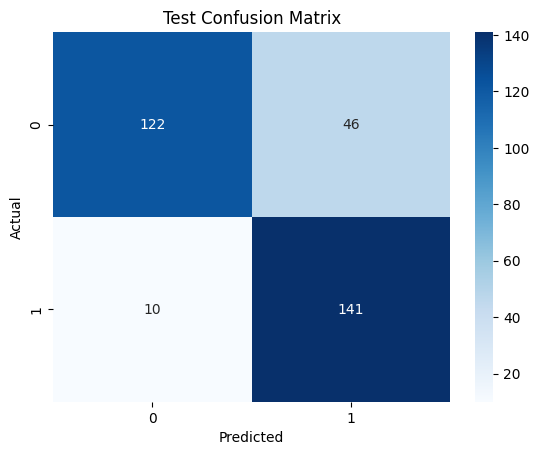

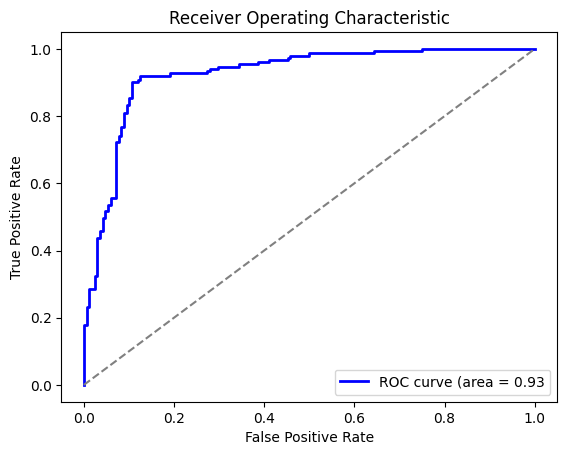

Model generalizes well


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE

# Assuming df is your DataFrame and 'target' is your target column
X = feature1
y = target1

# Feature engineering: Adding interaction feature
X['Claim_Income_Ratio'] = X['Claim_Amount'] / (X['Annual_Income'] + 1e-5)

# Scaling features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Handling class imbalance with SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Compute class weights
class_weights = compute_class_weight('balanced', classes=torch.unique(torch.tensor(y)).numpy(), y=y)
class_weights = torch.tensor(class_weights, dtype=torch.float32)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.long)
y_test = torch.tensor(y_test.values, dtype=torch.long)

# Define an enhanced neural network with more capacity
class EnhancedNN(nn.Module):
    def __init__(self, input_size):
        super(EnhancedNN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_size, 512),
            nn.BatchNorm1d(512),
            nn.LeakyReLU(),
            nn.Dropout(0.2),
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, 128),
            nn.LeakyReLU(),
            nn.Linear(128, 64),
            nn.LeakyReLU(),
            nn.Linear(64, 2)
        )

    def forward(self, x):
        return self.net(x)

# Model setup
input_size = X_train.shape[1]
model = EnhancedNN(input_size)
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-5)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=50)

# Training loop
epochs = 100
best_test_acc = 0
patience, patience_counter = 15, 0
min_target_acc = 0.85

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    scheduler.step()

    model.eval()
    with torch.no_grad():
        test_preds = model(X_test).argmax(dim=1)
    test_acc = accuracy_score(y_test, test_preds)

    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Test Accuracy: {test_acc:.4f}')

    if test_acc > best_test_acc:
        best_test_acc = test_acc
        patience_counter = 0
    else:
        patience_counter += 1

    if patience_counter >= patience and best_test_acc >= min_target_acc:
        print("Early stopping triggered")
        break

# Final evaluation
model.eval()
with torch.no_grad():
    train_preds = model(X_train).argmax(dim=1)
    test_probs = model(X_test)
    test_preds = test_probs.argmax(dim=1)

train_acc = accuracy_score(y_train, train_preds)
test_acc = accuracy_score(y_test, test_preds)
print(f"Final Train Accuracy: {train_acc:.2f}")
print(f"Final Test Accuracy: {test_acc:.2f}")
print("Test Classification Report:\n", classification_report(y_test, test_preds))

# Confusion matrix
cm = confusion_matrix(y_test, test_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC and AUC curve
probs = torch.softmax(test_probs, dim=1)[:, 1].cpu().numpy()
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Check for overfitting or underfitting
if train_acc > test_acc + 0.1:
    print("Model is overfitting")
elif test_acc < 0.7:
    print("Model is underfitting")
else:
    print("Model generalizes well")

# Save entire model (architecture + weights)
torch.save(model, 'enhanced_nn_model.pth')



In [ ]:
from sklearn.metrics import roc_curve
import numpy as np

# Get FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Youden's J statistic: TPR - FPR
youden_index = tpr - fpr

# Best threshold is where J is max
best_threshold = thresholds[np.argmax(youden_index)]

print(f"Best threshold: {best_threshold:.2f}")


Best threshold: 0.80


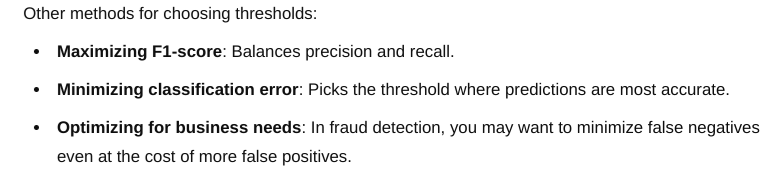

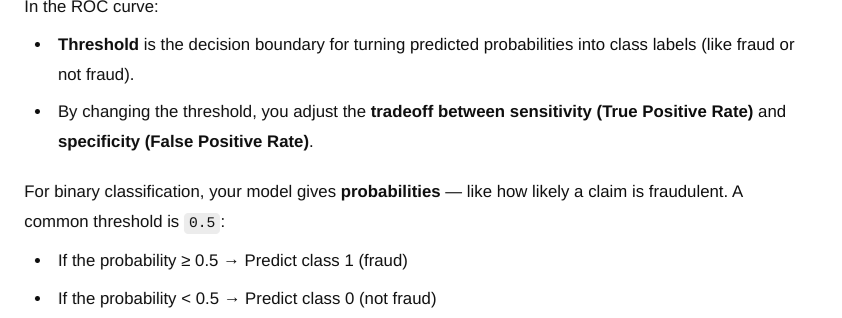

In [ ]:
#################################################################################################

# **How to Pick Best Threshold**

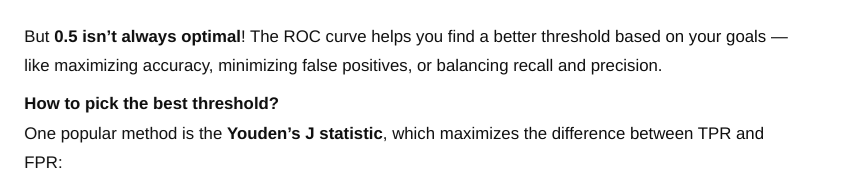

In [ ]:
####################################################################################################

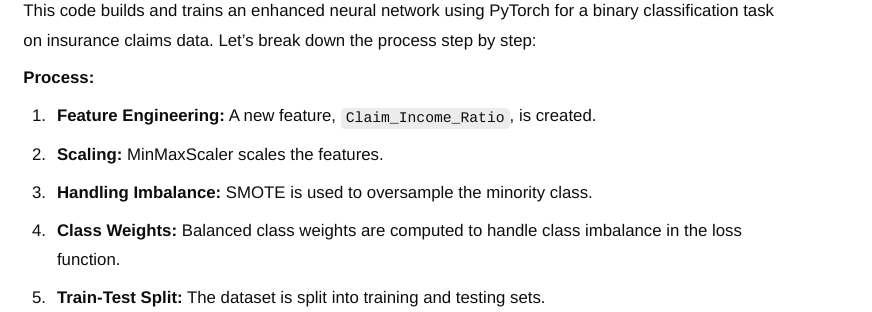

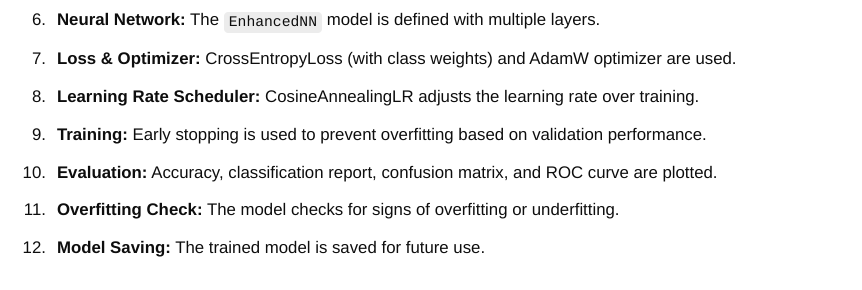

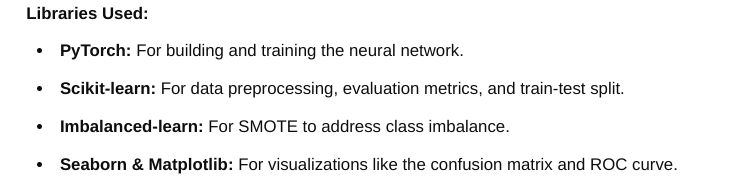

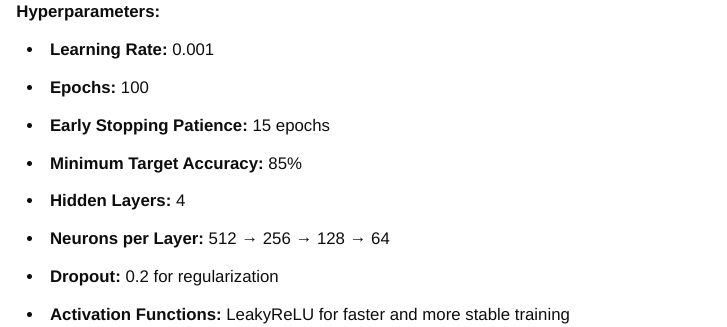

In [ ]:
#########################################################################################

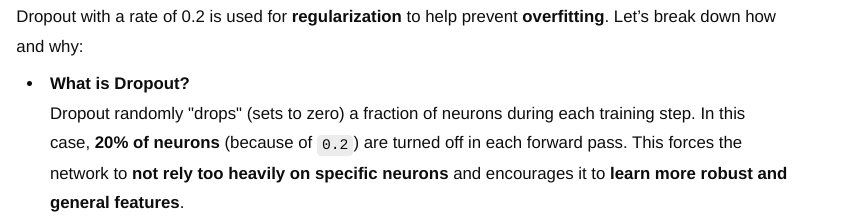

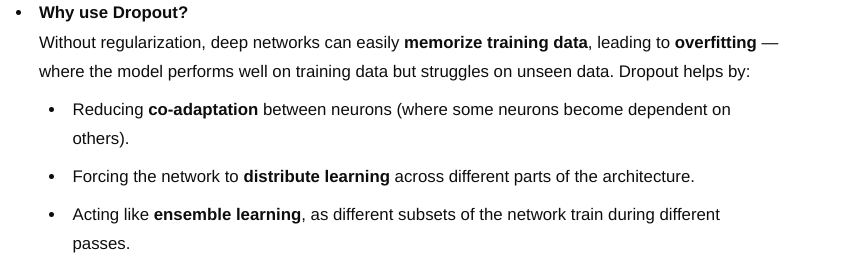

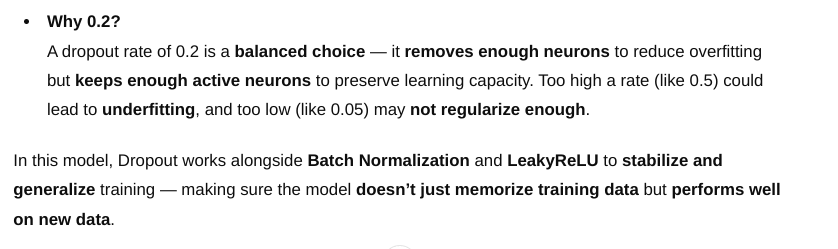